In [2]:
from geopredictors.facie_predictor.predictor import FaciesPredictor
from geopredictors.prediction_tool.permeability_predictor import permeability_predict


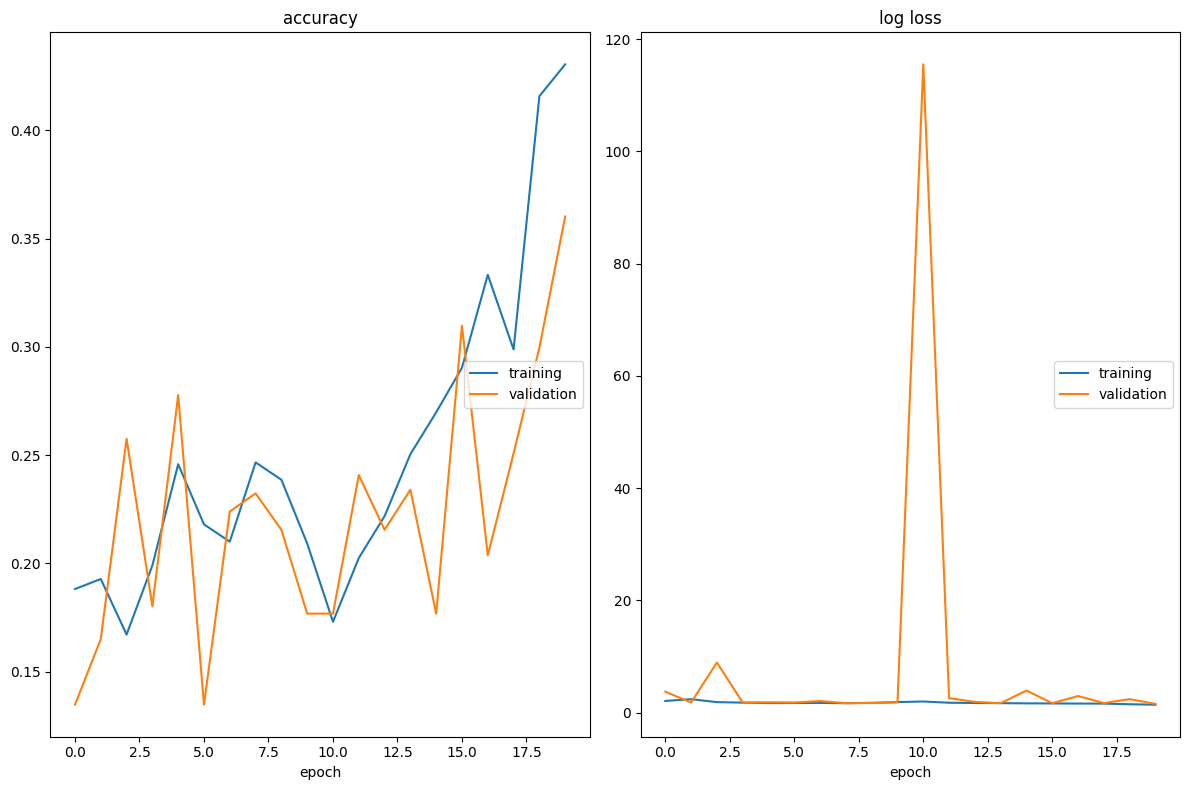

accuracy
	training         	 (min:    0.167, max:    0.431, cur:    0.431)
	validation       	 (min:    0.135, max:    0.360, cur:    0.360)
log loss
	training         	 (min:    1.419, max:    2.401, cur:    1.419)
	validation       	 (min:    1.564, max:  115.497, cur:    1.564)


In [2]:
#Let's initiate an instance of our FaciesPredictor class, without dropout and basic
predictor = FaciesPredictor(dropout=False)

#Now let's specify the path to the data we want to train the model with
#This is the path to the training data
training_path = '/home/yc4923/GEMS/Projects/ads-arcadia-geopredictors/data/small_training'

#We have the choice to either load a model or retrain it with new data.
#By the way if you want to retrain the data, you need to feed it with the 
#same type of data as the one used to train the model.
#refer to notebook called prepare_training_data.ipynb to see how to prepare the data
#To be honest I was going to make a .py file that prepares the training data but 
#I don't know what you want to feed it? csv files? or npy files? anyway just 
#use my training data. it's a balanced data set with 500 samples of each facies
#each sample is a npy file. 

#train without scheduler
predictor.train(training_path,epochs=50,lr=0.001,weight_decay=1e-4,scheduler=False)


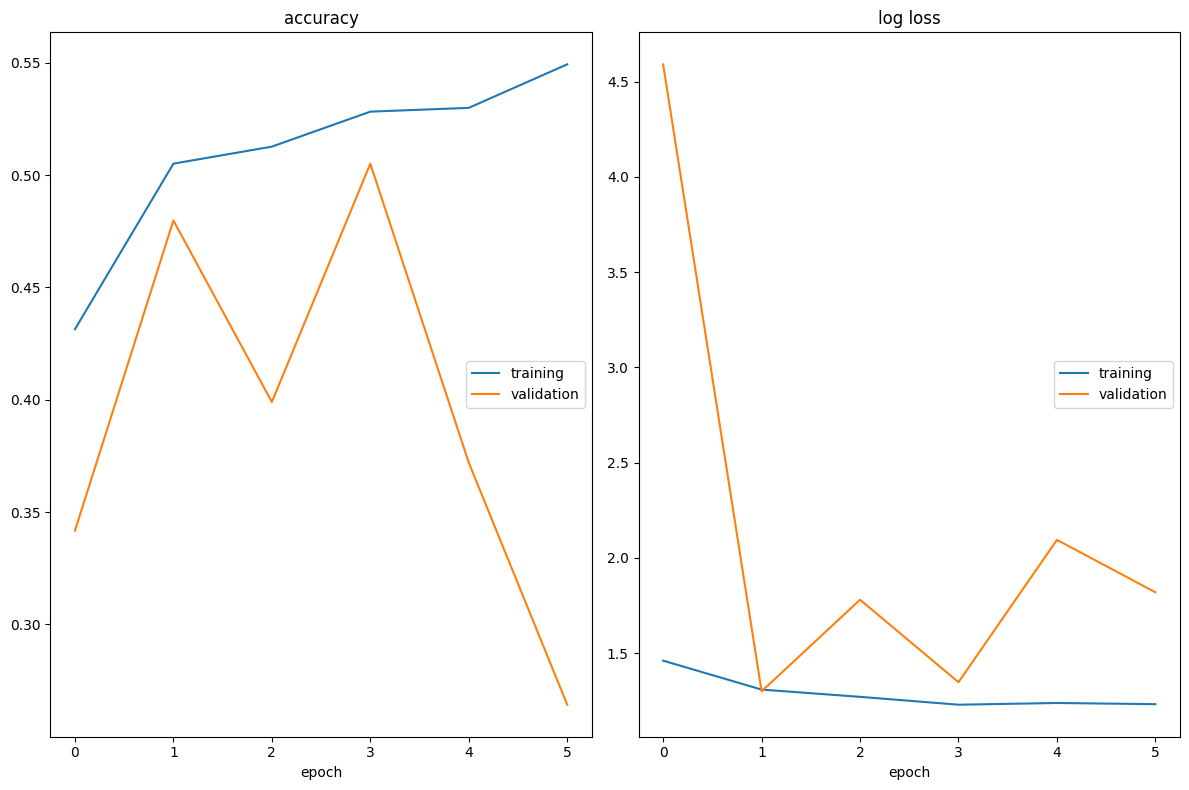

accuracy
	training         	 (min:    0.431, max:    0.549, cur:    0.549)
	validation       	 (min:    0.264, max:    0.505, cur:    0.264)
log loss
	training         	 (min:    1.229, max:    1.460, cur:    1.231)
	validation       	 (min:    1.299, max:    4.591, cur:    1.819)
Iteration [10/38] Loss: 87.7307 Accuracy: 0.1355


KeyboardInterrupt: 

In [5]:
#As we can see we got an accuracy of around 0.431
#Let's create another instance of our FaciesPredictor class
predictor2 = FaciesPredictor(dropout=True,dropout_rate=0.15)
training_path = '/home/yc4923/GEMS/Projects/ads-arcadia-geopredictors/data/small_training'
#This time we will train it using a scheduler
predictor2.train(training_path,epochs=100,lr=0.002,weight_decay=1e-4,scheduler=True)

In [2]:
#Optionally we can save the model
predictor2.save('/home/yc4923/GEMS/Projects/ads-arcadia-geopredictors/models/')

NameError: name 'predictor2' is not defined

In [1]:

#Now using our model let's test it on unseen data
#To predict facies we need to feed it with a npy image along with an npy respective depth
#Let's load the image and depth
from geopredictors.facie_predictor.predictor import FaciesPredictor
from geopredictors.prediction_tool.permeability_predictor import permeability_predict


image_path = '/home/yc4923/GEMS/Projects/ads-arcadia-geopredictors/data/small_test/204-20-3_image.npy'
depth_path = '/home/yc4923/GEMS/Projects/ads-arcadia-geopredictors/data/small_test/204-20-3_depth.npy'



/home/yc4923/miniconda3/envs/arcadia/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


No GPU available!


In [2]:

#Let's load our model first
l_predictor = FaciesPredictor(dropout=True,dropout_rate=0.15)
l_predictor.load_model('/home/yc4923/GEMS/Projects/ads-arcadia-geopredictors/models/_model_geoprediction.pth')
l_predictor.print_model()

/home/yc4923/miniconda3/envs/arcadia/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/yc4923/miniconda3/envs/arcadia/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Model loaded from /home/yc4923/GEMS/Projects/ads-arcadia-geopredictors/models/_model_geoprediction.pth
CustomResNet(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1),

In [3]:
#Let's predict the values and show our df
l_predictor.predict(image_path,depth_path)

: 

In [ ]:
#finally we can export the results
#This will save the predicted facies as a csv file, start and end depth along with corresponding facies
export_path = '/home/yc4923/GEMS/Projects/ads-arcadia-geopredictors/data/predicted_facies'
predictor2.export(export_path)